In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

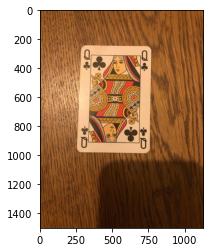

Docstring:
a.reshape(shape, order='C')

Returns an array containing the same data with a new shape.

Refer to `numpy.reshape` for full documentation.

See Also
--------
numpy.reshape : equivalent function

Notes
-----
Unlike the free function `numpy.reshape`, this method on `ndarray` allows
the elements of the shape parameter to be passed in as separate arguments.
For example, ``a.reshape(10, 11)`` is equivalent to
``a.reshape((10, 11))``.
Type:      builtin_function_or_method


In [7]:
#image = imread('C:/Users/Wojtek/Desktop/5 semestr/kck/projekt_obrazy/images/14-1.jpg')
#Conv1D(1, 3, input_shape=(8, 1))
path="C:/Users/Wojtek/Desktop/projekt_obrazy"
#image = imread('C:/Users/Wojtek/Desktop/5 semestr/kck/projekt_obrazy/images/14-1.jpg')
image = imread(path+'/images/14-1.jpg')
image.reshape?
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

In [9]:
a=tf.keras.layers.Conv2D(1, 3, input_shape=(8, 1))
a=tf.keras.layers.Conv2D(64, (3,3), activation='relu')
print(a)

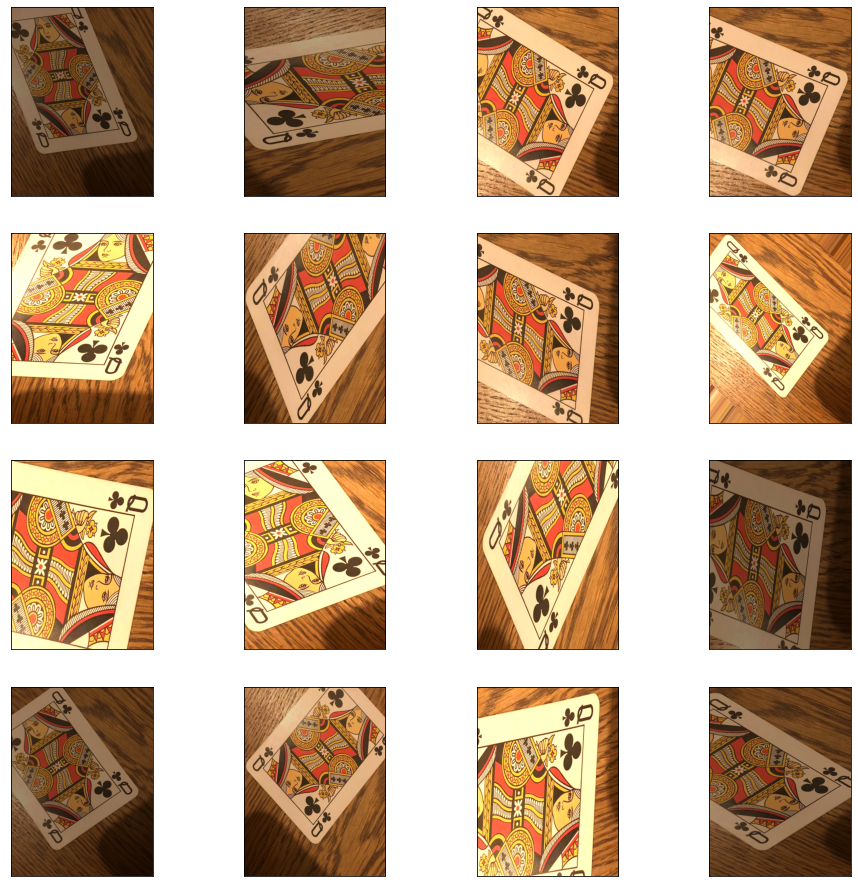

In [17]:
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
data_generator.fit(images)
image_iterator = data_generator.flow(images)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_iterator.next()[0].astype('int'))
plt.show()

In [18]:
labs = ['3 of spades', '3 of hearts', '4 of diamonds', '5 of clubs', '10 of diamonds', 
        'queen of clubs', '5 of diamonds', 'jack of diamonds', '2 of diamonds', '2 of spades',
        '2 of hearts', '7 of clubs', 'jack of clubs', 'queen of diamonds', '9 of diamonds',
        '4 of hearts', '6 of clubs', 'king of clubs', '9 of spades', 'king of diamonds', 'as of diamonds',
        'as of clubs', '10 of spades', '6 of hearts', '4 of spades', '3 of clubs', '7 of diamonds',
        'queen of spades', '8 of spades', 'queen of hearts', '8 of hearts', '7 of spades', '10 of hearts',
        '9 of hearts', '9 of clubs', '7 of hearts', '5 of hearts', 'jack of hearts', '8 of clubs', '2 of clubs',
        '8 of diamonds', '4 of clubs', '6 of diamonds', '6 of spades', 'jack of spades', 'as of spades',
        '3 of diamonds', '5 of spades', 'king of hearts', 'king of spades', '10 of clubs', 'as of hearts']


In [19]:
data=[]

for i, img in tqdm(enumerate(os.listdir('images/'))):
    label=i
    
    img = cv2.imread('images/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(50):
        img_transformed=image_iterator.next()[0].astype('int')/255
        data.append([img_transformed, label])

shuffle(data)


52it [00:05,  9.46it/s]


In [20]:
np.save('C:/Users/Wojtek/Desktop/5 semestr/kck/projekt_obrazy/dataset/data.npy', data)

C:\Users\Wojtek\.conda\envs\keras_kck_obrazy\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [21]:
data = np.load('C:/Users/Wojtek/Desktop/5 semestr/kck/projekt_obrazy/dataset/data.npy', allow_pickle=True)

train=data[:2300]
test=data[2300:]

train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])
    
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)



In [22]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=150
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, 
                    validation_data=(test_X, test_y), callbacks=[cp]).history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

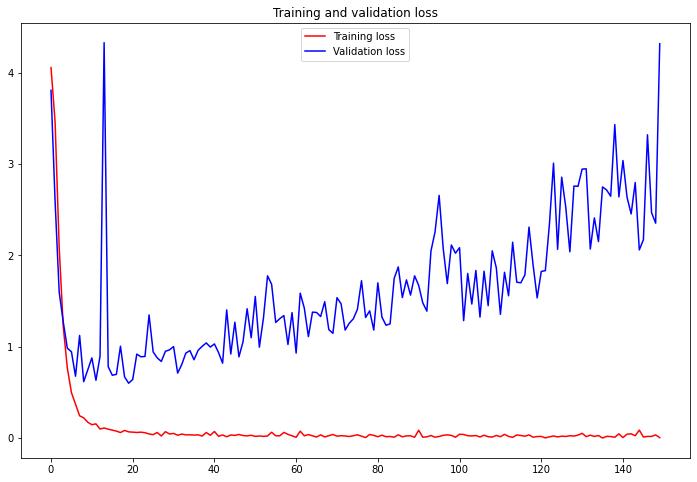

<Figure size 432x288 with 0 Axes>

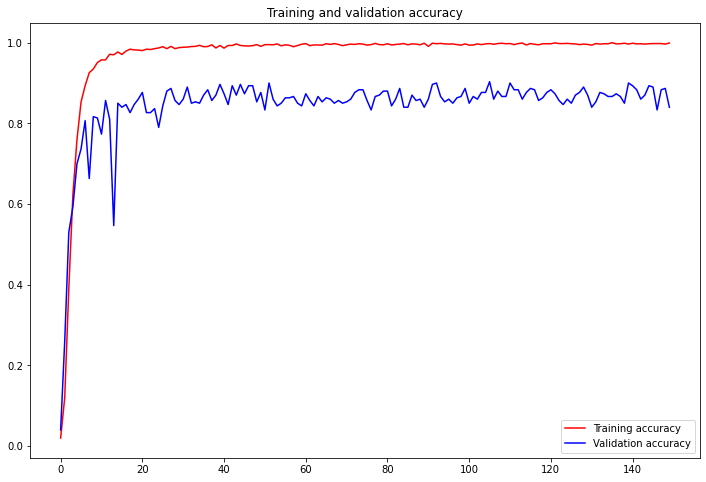

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

plt.figure(figsize = (12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.figure(figsize = (12,8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

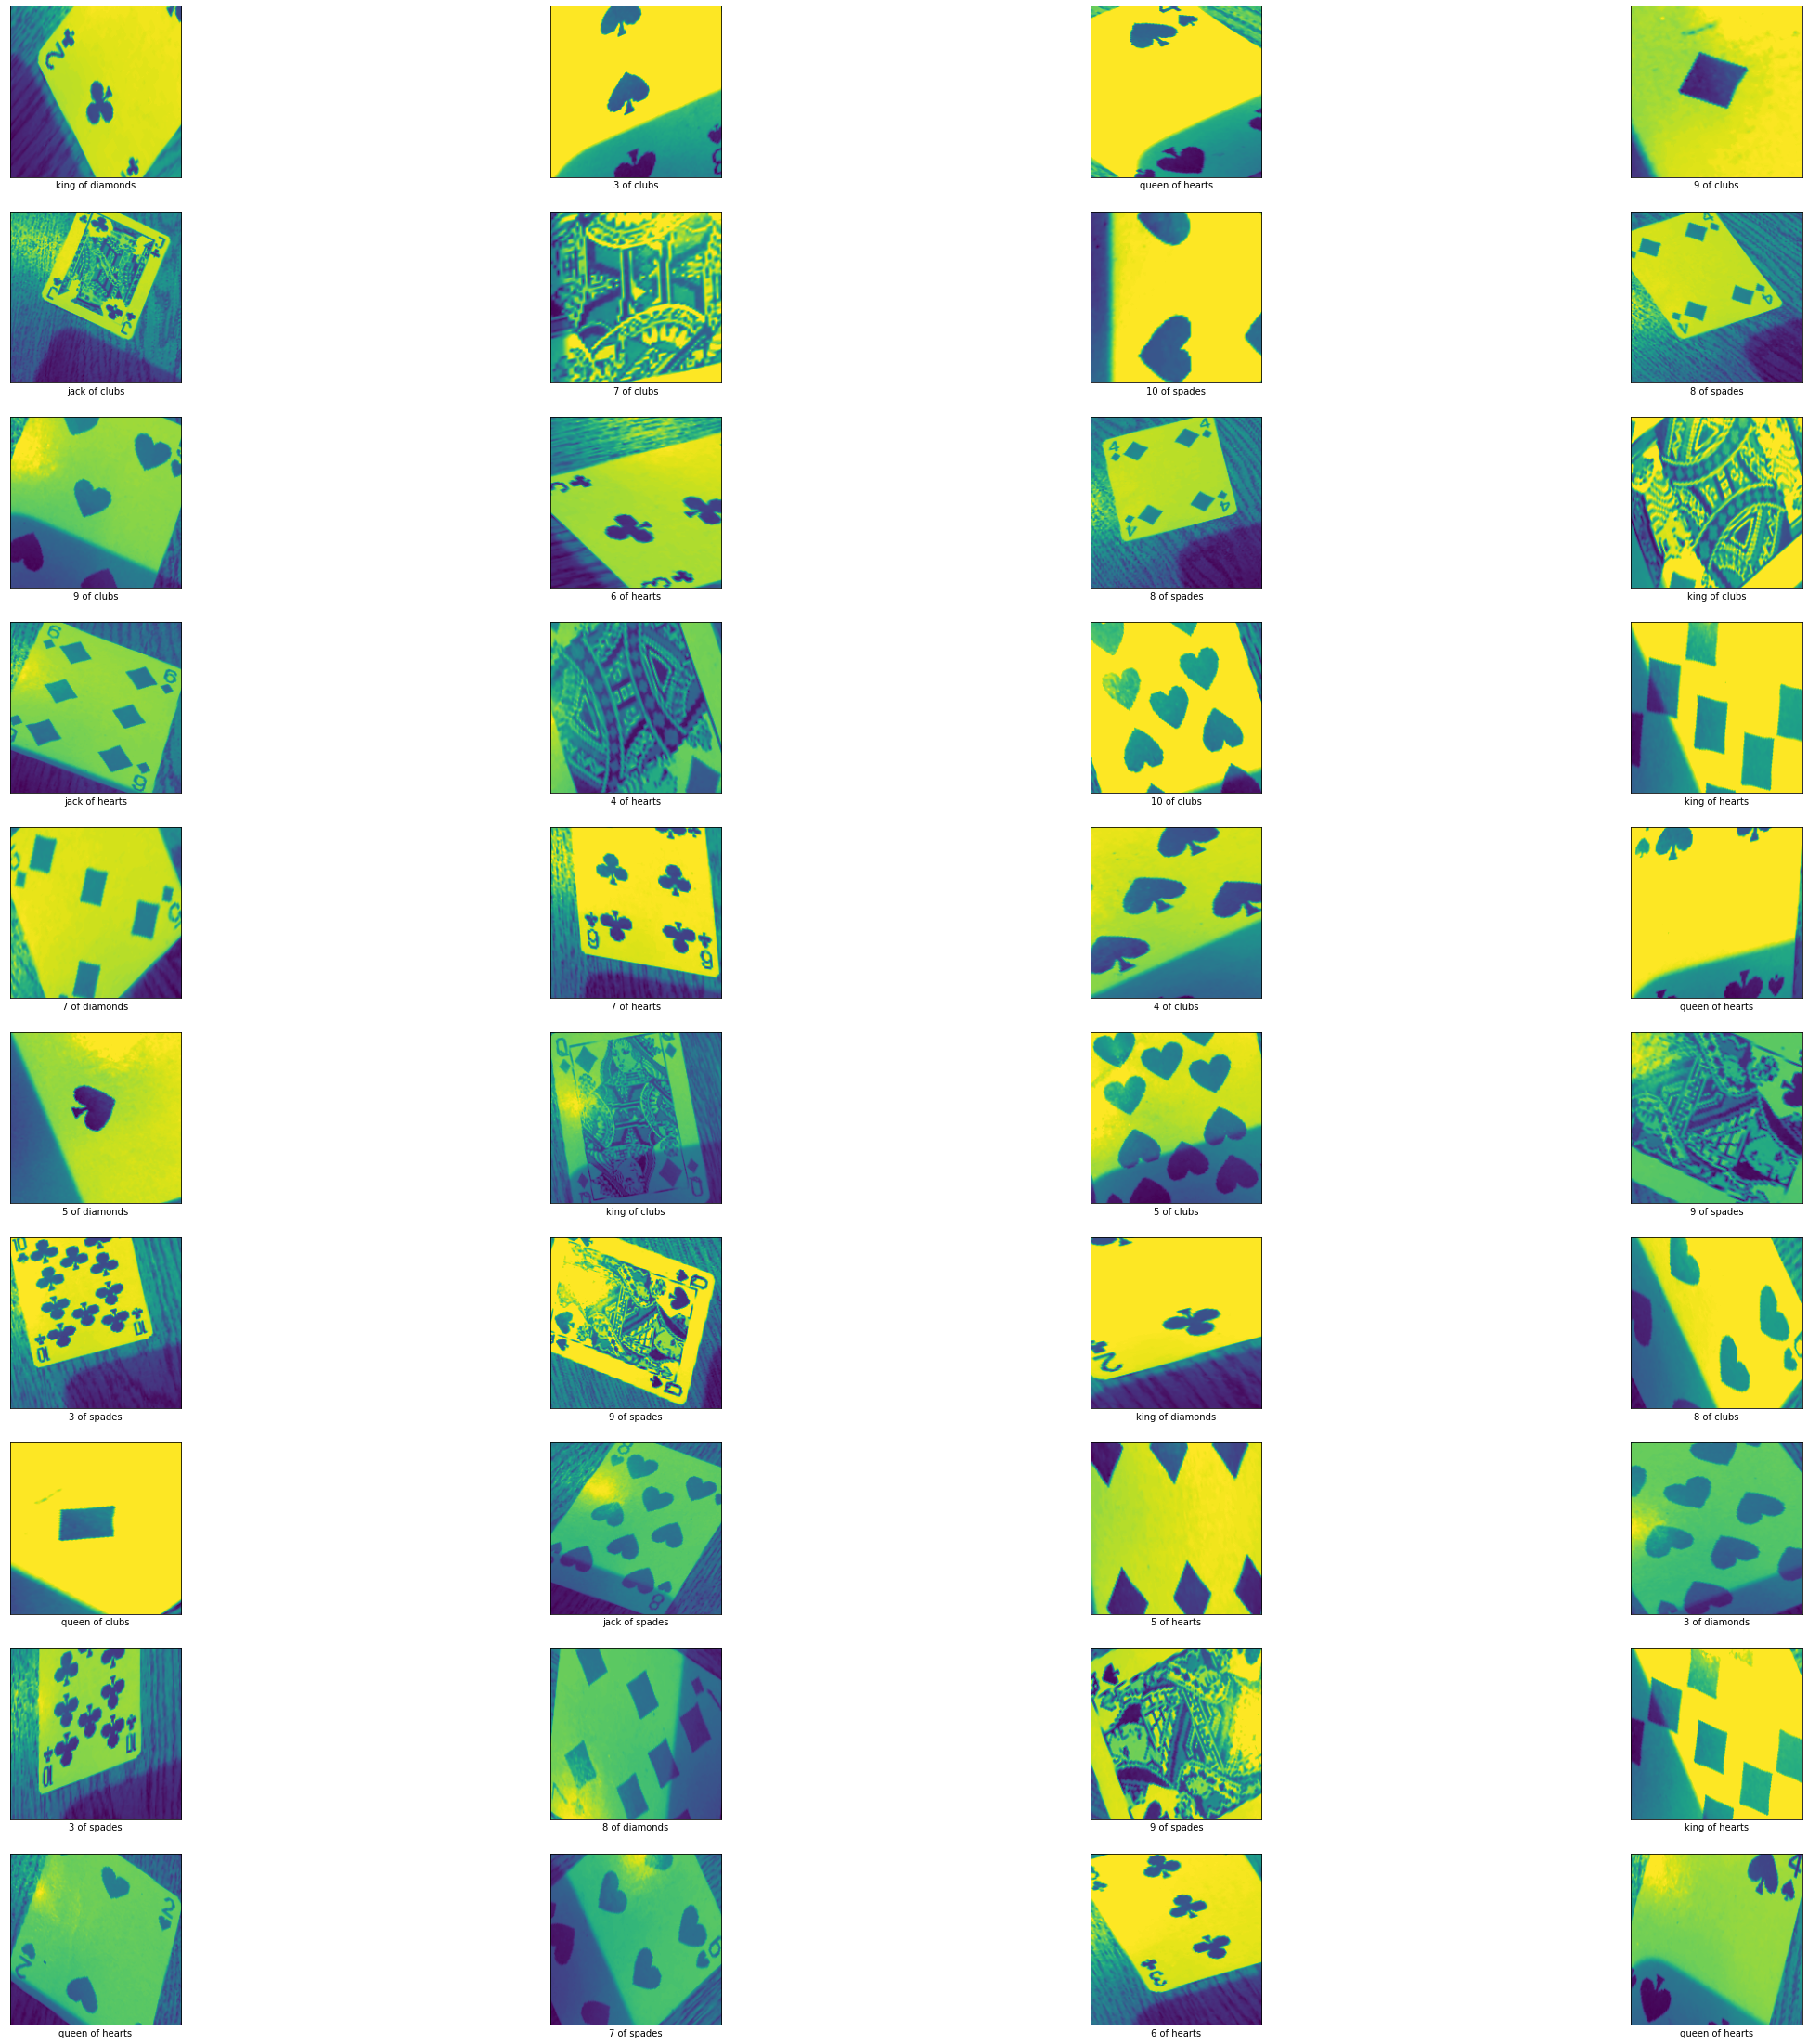

In [24]:
#df=pd.read_csv('C:/Users/Wojtek/Desktop/5 semestr/kck/projekt_obrazy/card_labels.csv', sep = ';')
#labels=list(df['label'])
labels = labs
predictions=model.predict_classes(test_X)

sample=test_X[:40]

plt.figure(figsize=(40,40))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    plt.xlabel(labels[predictions[i]])
plt.show()

In [25]:
len(predictions)
pred = predictions[:300]
print(pred)

[19 25 29 34 12 11 22 28 34 23 28 17 37 15 50 48 26 35 41 29  6 17  3 18
  0 18 19 38  5 44 36 46  0 40 18 48 29 31 23 29  4  2 38 10 31  6 38  2
  9 36 43 30 21 44 31  4 37 25 38 43 16 21 22 25 32 15 20 15 49 23 11 20
 20 16 39  7  3 20  1 25 15 45 41 10 50 22  8  3 34 27  5 21 21 30 25 10
 22 19 44  0 18 12 18 11 23 19 48 10 10 21 13 16 19 12 11 11 48 24 19 44
 21  5 23 20 19 12 42 43 43  2 14 23 44 16 43  3 38 47 44 25 24 48  7 11
  8 32 15 38 47 37  7 38 18 51 23 17 46 45 37 37 45 15 31 26 19 25 18 27
 41 13  3 26 35 40 50 14 47 51 10 16 17 14 13 12 31 16 14  0 33 21 51  4
 20 10 29 31 36 30 37 47 42  1  0 19 30  8 45 19 13  6 47  7 20 20 33  9
 51 39  1 51 25 16 31 22 24 44 50 27 21 34 15 33 25 31 22 17 29 32 31 20
 44 46  5 28 32 46 45 38 31 28 40  3 16  4 41 22 13  6 49 31 15 29 21 10
 32 21 50 37  8 47  7 42 31 35 32 48 49  3 43  1 28 31 11 16 16  9  5 45
 32 43  0 21 50 18 47 20 35 25 48 43]


In [26]:
orginal = []
for i in range(300):
    orginal.append(data[2300+i][1])
print(orginal)

[19, 25, 29, 5, 8, 17, 38, 28, 34, 23, 28, 13, 36, 13, 50, 48, 32, 35, 41, 29, 6, 17, 3, 18, 0, 18, 19, 38, 5, 46, 36, 46, 0, 40, 18, 48, 22, 38, 23, 29, 26, 2, 38, 10, 31, 6, 38, 3, 9, 36, 50, 2, 21, 46, 31, 4, 37, 34, 41, 43, 16, 21, 22, 25, 32, 15, 20, 15, 49, 23, 11, 20, 20, 12, 39, 34, 3, 20, 1, 27, 15, 45, 41, 10, 50, 22, 8, 3, 34, 27, 5, 21, 21, 29, 25, 10, 29, 19, 46, 0, 18, 12, 18, 11, 23, 33, 48, 10, 10, 21, 13, 16, 19, 8, 11, 11, 48, 24, 19, 44, 30, 5, 41, 24, 19, 12, 42, 43, 43, 2, 14, 23, 40, 16, 43, 3, 38, 47, 44, 25, 24, 48, 7, 11, 8, 32, 17, 38, 47, 41, 7, 38, 18, 51, 23, 17, 46, 45, 37, 36, 45, 15, 31, 32, 19, 25, 18, 27, 41, 13, 3, 26, 35, 40, 50, 14, 47, 51, 10, 16, 17, 14, 51, 12, 31, 16, 14, 0, 33, 21, 51, 4, 20, 10, 29, 40, 36, 30, 39, 47, 42, 1, 0, 19, 21, 8, 45, 19, 13, 6, 47, 7, 20, 20, 33, 9, 51, 39, 1, 51, 6, 16, 31, 22, 24, 44, 50, 27, 21, 34, 11, 33, 25, 40, 22, 17, 21, 32, 31, 20, 44, 46, 5, 28, 32, 46, 45, 38, 31, 28, 40, 3, 8, 4, 41, 36, 13, 6, 49, 45, 1

In [27]:
rate = []
for i in range(300):
    if pred[i] == orginal[i]:
        rate.append(1)
    else:
        rate.append(0)
print(rate)

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
sum = 0
for i in rate:
    sum += i
sum

252

In [30]:
sum/300

0.84